## Project Team
- **Shreekkanth K**
- **Thangarajan S**
- **Dinesh**
- **Amit**

## Mentor
- **Kiran K**

#### PROBLEM STATEMENT

    • DOMAIN: Industrial safety. NLP based Chatbot.
    • CONTEXT:

    The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

#### • DATA DESCRIPTION:

    This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

    Columns description:

    ‣ Data: timestamp or time/date information
    ‣ Countries: which country the accident occurred (anonymised)
    ‣ Local: the city where the manufacturing plant is located (anonymised)
    ‣ Industry sector: which sector the plant belongs to
    ‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    ‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
    ‣ Gender: if the person is male of female
    ‣ Employee or Third Party: if the injured person is an employee or a third party
    ‣ Critical Risk: some description of the risk involved in the accident
    ‣ Description: Detailed description of how the accident happened.
    Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing, Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

#### • PROJECT OBJECTIVE:

    Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.

#### • PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]

    1. Milestone 1: [ Duration: 2 weeks, Score: 20 points] 
    ‣ Input: Interim report
    ‣ Process:
        ‣ Step 1: Import the data
        ‣ Step 2: Data cleansing
        ‣ Step 3: Data preprocessing
        ‣ Step 4: Data preparation to be used for AIML model learning
        ‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning 
    
    2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
    ‣ Input: Output of milestone 1 
    ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
        ‣ Submission: Interim report

    3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
        ‣ Input: Pickled model from milestone 2 
        ‣ Process: [ 15 points ]
        ‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ] 
        ‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ] 
        ‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
        ‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers. ‣ Submission: Final report [ 45 points ]
        ‣ Hints:
        ‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
        ‣ To make GUI as a desk app you can use TKINTER library.
        ‣ To make web service GUI you can use FLASK or DJANGO library.

## Solution 

### Approach

#### 1. Milestone 1: [ Duration: 2 weeks, Score: 20 points] 

- **Input: Interim report**


- **Process:**


- **Step 1: Import the data**
    
     We loaded the csv file as pandas dataframe to use it for all our analysis and modeling purpouses.
     
    
- **Step 2: Data cleansing**
    
    Cleaned the data before starting the analysis to avoid running into semantic errors.
    
    
- **Step 3: Data preprocessing**
    
    Initial level of data preprocessing was performed to change categorical features into encoded features.
    
    
- **Step 4: Data preparation to be used for AIML model learning**
    
    Detailed EDA was performed on every existing & derived feature to get insights out of the data using interactive & dynamic plots. The conclusive insights are provided below every chart for better understanding
    
    
- **Output:**

    Clean data as .xlsx or .csv file to be used for AIML model learning

## Import Required packages

In [71]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

#### ‣ Step 1: Import the data

## Import Dataset and basic info

In [72]:
data=pd.read_csv("Data Set - industrial_safety_and_health_database_with_accidents_description.csv")

In [73]:
print("Number of rows = {0}\nNumber of Columns = {1} ".format(data.shape[0], data.shape[1]))

Number of rows = 425
Number of Columns = 11 


In [74]:
data.head(3)

,Unnamed: 0,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,01-01-16 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,02-01-16 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,06-01-16 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


### Display columns

In [75]:
data.columns

Index(['Unnamed: 0', 'Date', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

### Rename columns

In [76]:
#Dropping the unnamed column & renaming the columns with spelling mistake
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,01-01-16 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-16 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-16 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


### Display datatypes

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


### Display count of unique values per column

In [78]:
columns = data[data.columns[~data.columns.isin(['Description', 'Unnamed: 0', 'Date'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\nUnique count per label is:\n{data[cols].value_counts()}\n')

Unique values for Country is 
['Country_01' 'Country_02' 'Country_03']
Unique count per label is:
Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

Unique values for Local is 
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
Unique count per label is:
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_11     2
Local_09     2
Name: Local, dtype: int64

Unique values for Industry Sector is 
['Mining' 'Metals' 'Others']
Unique count per label is:
Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

Unique values for Accident Level is 
['I' 'IV' 'III' 'II' 'V']
Unique count per label is:
I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

Unique values for Potential Accident Level is 
['IV' 'III' 'I' 'II' 

### Replace categorical values

In [79]:
# replacing categorical values
replace_struc = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5}
data['Accident Level'] = data['Accident Level'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_struc)
del replace_struc

In [80]:
print(f'Dataset after mapping categorical values\n')
data.head()

Dataset after mapping categorical values



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,01-01-16 0:00,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-16 0:00,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-16 0:00,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-16 0:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-16 0:00,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


### Check for null values

In [81]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

### Five point Summary

In [82]:
data.describe() #5-Point Summary analysis

,Local,Accident Level,Potential Accident Level
count,425.000000,425.000000,425.000000
mean,4.734118,0.689412,2.696471
std,2.772402,1.371030,1.579531
min,1.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000
50%,4.000000,0.000000,3.000000
75%,6.000000,1.000000,4.000000
max,12.000000,5.000000,6.000000


In [83]:
data.describe(include=object)

,Date,Country,Industry Sector,Gender,Employee type,Critical Risk,Description
count,425,425,425,425,425,425,425
unique,287,3,3,2,3,33,411
top,08-02-17 0:00,Country_01,Mining,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,241,403,189,232,3


In [84]:
data.shape

(425, 10)

## Data Preparation

In [85]:
#For time series analysis
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday
1,2016-02-01,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday
2,2016-06-01,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday


#### The Date feature is converted to year, month, day & weekday to better understand the data

## Inference

- Small data set(425x11) but with relevant information.
- Removed unnecessary column named ”Unnamed: 0” & "Data" as we do not know any related metadata and adds no value to the analysis.
- The given data is clean with no nulls in any columns.
- Renamed columns with spelling mistakes and space
- Most of the features are categorical in nature.
- Potential Accident Level is our target variable and has 6 classes (0-5)
- Five Point Summary analysis:
    - Country 01 is the country where most of the accidents happen (more than 50%)
    - Local 03 (which also belongs to Country 01) is where most of the accidents happen
    - Mining is also the most significant contributor to accidents
    - Male (95%) and Third Party (43%) also counts for kind of people that suffers more accident

# EDA

## Statistical Analysis

### Proportion of own employees in each gender is not equal. But let's check is that difference is statistically significant?

1. State the H0 and Ha

    Ho = The proportions of own employees in each gender is equal.
    
    Ha = The proportions of own employees in each gender is not equal.
    
    
2. Decide the significance level: alpha = 0.05


3. Identify the test-statistic: Z-test of proportions


4. Calculate the p_value using test-statistic

In [86]:
data.groupby([data[data['Employee type'] == 'Employee']['Gender']])['Gender'].count()

Gender
Female      8
Male      171
Name: Gender, dtype: int64

In [87]:
male_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[0]
female_emp = data[data['Employee type'] == 'Employee'].Gender.value_counts()[1]


Male_cnt = data[data['Gender'] == 'Male']['Gender'].count()
Female_cnt = data[data['Gender'] == 'Female']['Gender'].count()

print([male_emp, female_emp], [Male_cnt, Female_cnt])
print(f'Proportion of own employee types in male, female = {round(170/396,2)}%, {round(8/22,2)}% respectively')

[171, 8] [403, 22]
Proportion of own employee types in male, female = 0.43%, 0.36% respectively


In [88]:
from statsmodels.stats.proportion import proportions_ztest
t_statistic, p_value = proportions_ztest([male_emp, female_emp], [Male_cnt, Female_cnt])

print("t_statistic", t_statistic)
print("p_value", p_value)

t_statistic 0.5613307169271039
p_value 0.5745721052729147


#### Decide to Reject or Accept Null Hypothesis

In [89]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


#### Inference:
 - Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

## Univariate Analysis

In [90]:
data['Country'].value_counts()

Country_01    251
Country_02    130
Country_03     44
Name: Country, dtype: int64

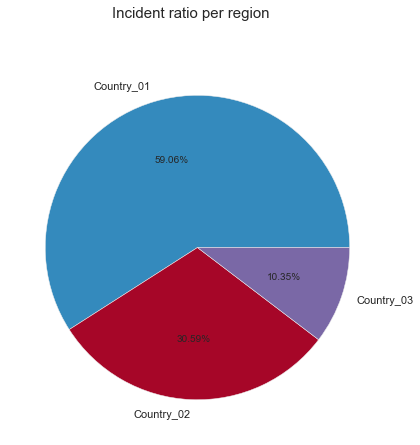

In [91]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Incident ratio per region', fontsize=15)
plt.pie(data['Country'].value_counts(), labels=['Country_01', 'Country_02','Country_03'], explode=(0,0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
- Country_01 has more incident records - 59.06% 
- Country_02 has 30.59% of incident registered
- Country_03 has 10.35% of records

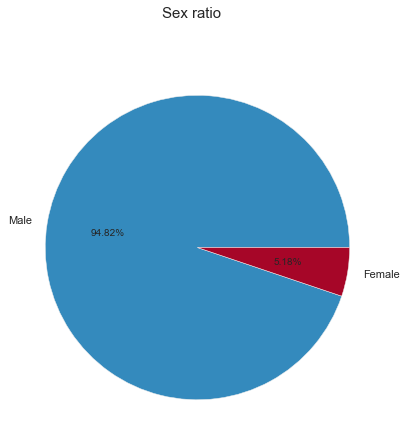

In [92]:
fig=plt.figure(figsize=(7,7))
fig.suptitle('Sex ratio', fontsize=15)
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0,0),autopct = '%1.2f%%')
plt.show()

#### Inference:
 - Male employees are much impacted during the accident at workplace than the female employees

<AxesSubplot:xlabel='Industry Sector', ylabel='count'>

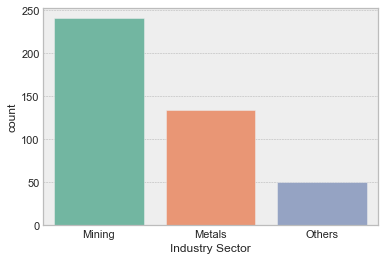

In [93]:
sns.countplot(data=data,x=data['Industry Sector'],palette = "Set2")

In [94]:
#Percentage of contribution
data['Industry Sector'].value_counts(normalize=True)*100

Mining    56.705882
Metals    31.529412
Others    11.764706
Name: Industry Sector, dtype: float64

#### Inference:
 - Above plots depicts Mining industry sector has more Accidents, followed by Metals Industry Sector and others 

In [95]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
Year                        0
Month                       0
Day                         0
Weekday                     0
dtype: int64

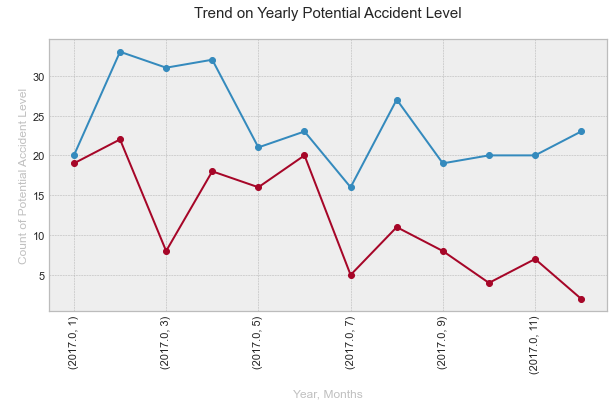

In [96]:
#Accident patterns by yearly
fig,(ax1) = plt.subplots()
ax1.set_title('Trend on Yearly Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['Year']==2016]['Year'],'Month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['Year']==2017]['Year'],'Month'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months').set_color('silver')
plt.ylabel('\nCount of Potential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
 - Above plot depicts the count of Potential Accident Level for each month against the years (2016 & 2017)

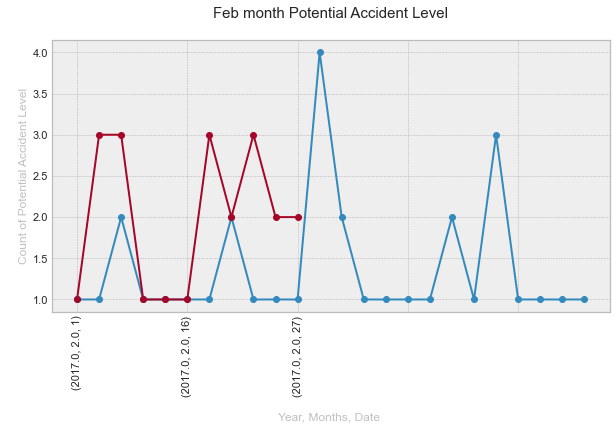

In [97]:
# EDA for hightest Accident month - Feb per Above analysis
fig,(ax1) = plt.subplots()
ax1.set_title('Feb month Potential Accident Level\n',fontsize = 15)
data.groupby([data[data['Year']==2016]['Year'],data[data['Month']==2]['Month'],'Day'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
data.groupby([data[data['Year']==2017]['Year'],data[data['Month']==2]['Month'],'Day'])['Potential Accident Level'].count().plot(style="-o", figsize=(10, 5))
plt.xlabel('\nYear, Months, Date ').set_color('silver')
plt.ylabel('\nCount of Potential Accident Level').set_color('silver')
plt.xticks(rotation = 'vertical')
plt.show()

#### Inference:
 - Per day Potential Accident count level was higher on 2017 month of Feb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Fall prevention (same level)'),
  Text(11, 0, 'remains of choco'),
  Text(12, 0, 'Pressurized Systems'),
  Text(13, 0, 'Fall prevention'),
  Text(14, 0, 'Suspended Loads'),
  Text(15, 0, 'Power lock'),
  Text(16, 0, 'Pressurized Systems / Chemical Substances'),
  Text(17, 0, 'Blocking and isolation of energies'),
  Text(18, 0, 'Liquid Metal'),
  Text(19, 0, 'Projection of fragments'),
  Text(20, 0, 'Electrical Shock'),
  Text(21, 0, 'Machine Protection'),
  Text(22, 0, 'Poll'),
  Text(23, 0, '\nNot applicable'),
  Text(24, 0, 'Individual p

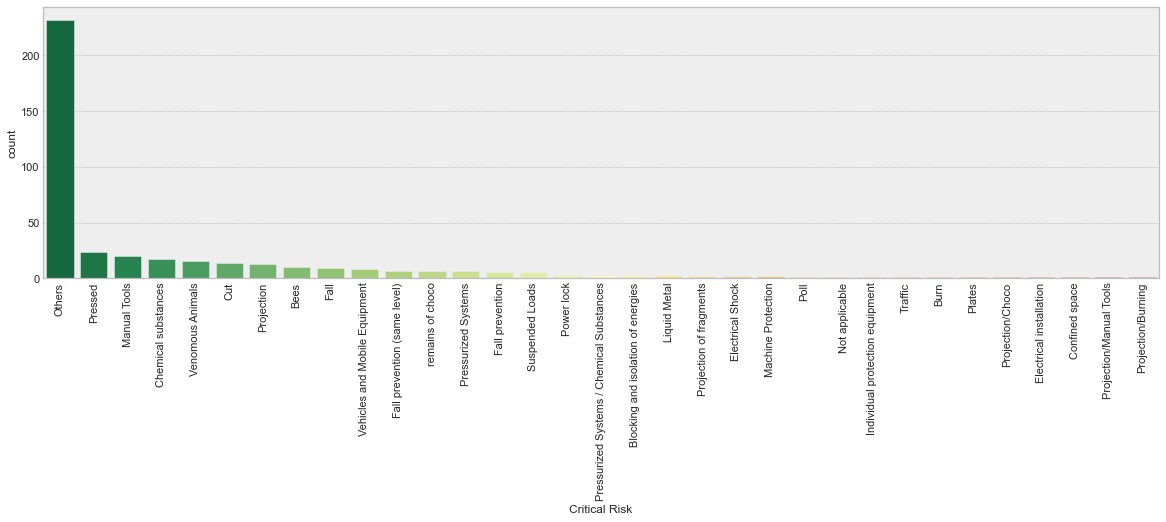

In [98]:
#Analysising Critical Risk - count of each items
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Critical Risk'],palette = "RdYlGn_r",order=descending_order)
plt.xticks(rotation = 'vertical')

#### Inference:
 - 232 records are uncategorised risks (others), followed by 24 records of Pressed issues

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

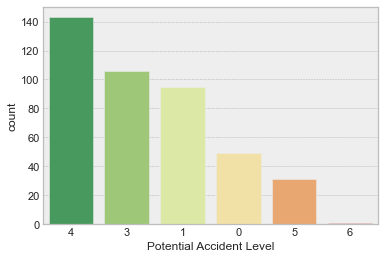

In [99]:
#Trend on Potential Accident Level
descending_order = data['Potential Accident Level'].value_counts().sort_values(ascending=False).index
sns.countplot(data=data,x=data['Potential Accident Level'],palette = "RdYlGn_r",order=descending_order)

In [100]:
#Percentage of contribution
data['Potential Accident Level'].value_counts(normalize=True)*100

4    33.647059
3    24.941176
1    22.352941
0    11.529412
5     7.294118
6     0.235294
Name: Potential Accident Level, dtype: float64

#### Inference:
 - 33.64 % of risk belongs to Potential Accident Level 3   
 - 24.9 % of risk belongs to Potential Accident Level 2 
 - 22.4 % of risk belongs to Potential Accident Level 1
 - 11.5 % of risk belongs to Potential Accident Level 0
 - 7.3 % of risk belongs to Potential Accident Level 4
 - 0.24 % of risk belongs to Potential Accident Level 5
    
- It is clearlty evident that the given dataset is highly imbalanced.

## Multivariate Analysis

In [101]:
# Helper function for relation between Accident Level/Potential Accident levels
# and other labels
def target_count(df, col1):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()

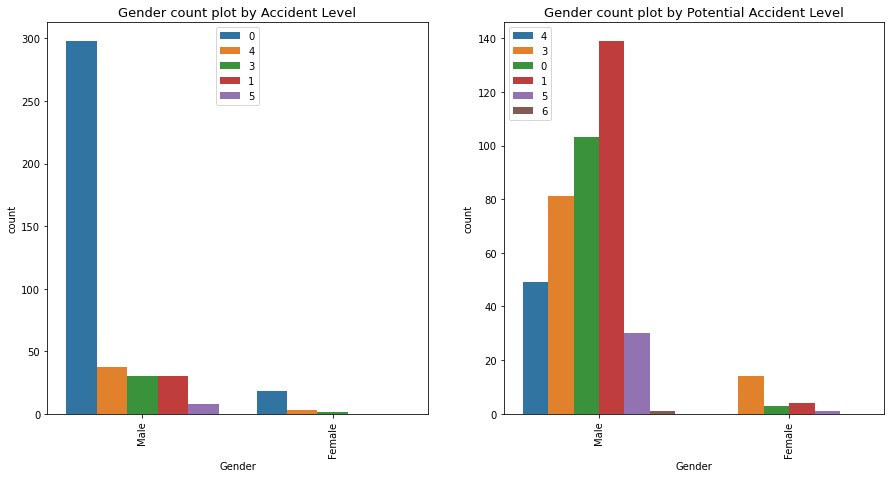

In [33]:
target_count(data, 'Gender')

### Inference

#### Analysis of Gender wrt Accident/ Potential Accident Level

 - We see that Male accidents are higher in number than female numbers but we also need to account the data disparity as female employee count in the firms itself could be low

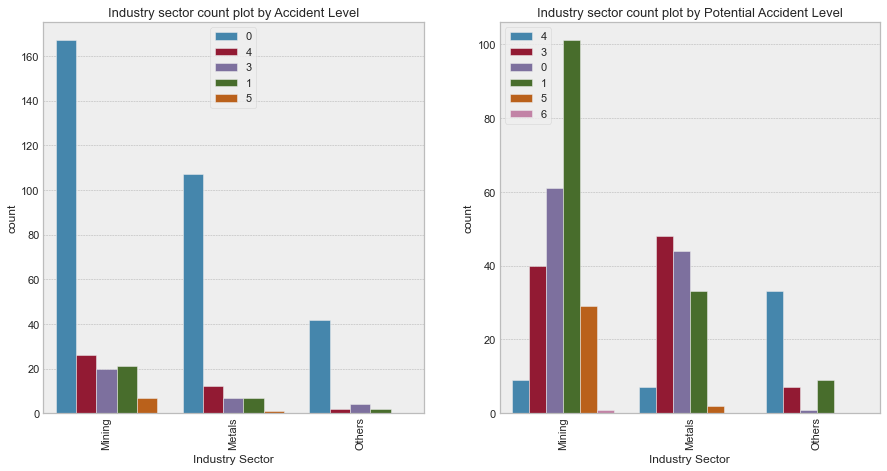

In [102]:
target_count(data, 'Industry Sector')

### Inference

#### Analysis of Industry Sector wrt Accident/ Potential Accident Level

- This drill down help us understand that not only mining has highest number of accident, the severity of those accidents are really high as well compared to other industries

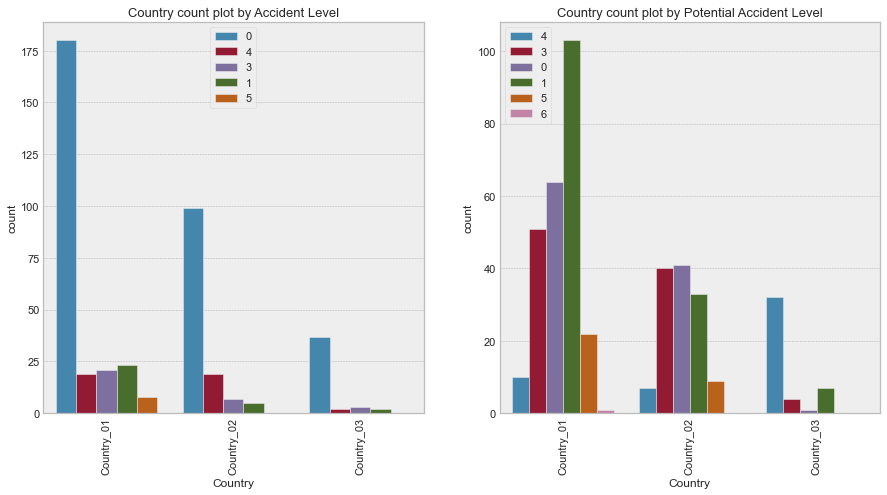

In [103]:
target_count(data, 'Country')

### Inference

#### Analysis of Country wrt Accident/ Potential Accident Level

- Country_01 has highest level 0 to level 5 accidents
- A further drill down on the type of industry available in each country can help us assess why the accident rate is really high in this country

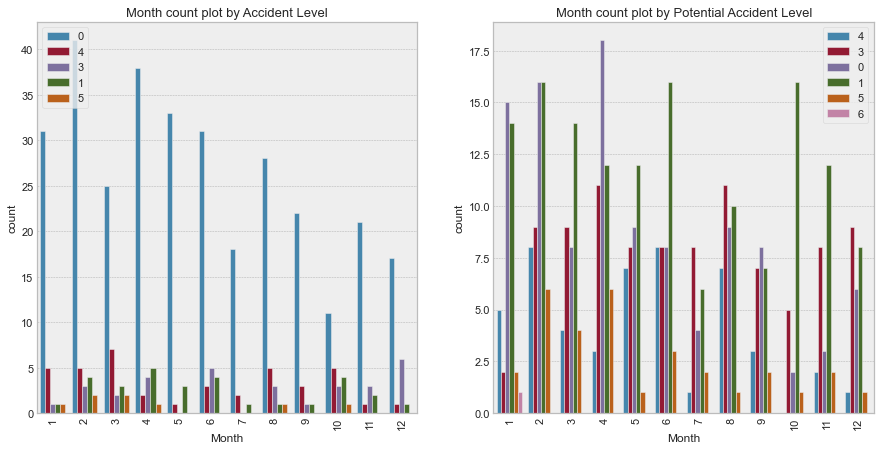

In [104]:
target_count(data, 'Month')

### Inference

#### Analysis of Month wrt Accident/ Potential Accident Level

- To further drill down on the report we can see incident rates in months
- This further helps our theory as the counts of potential accident are really high in the month of Feb.

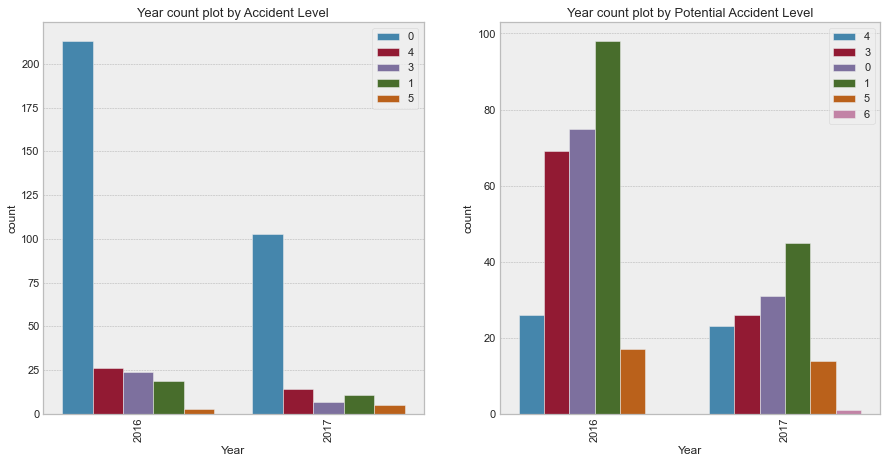

In [105]:
target_count(data, 'Year')

### Inference

#### Analysis of Year wrt Accident/ Potential Accident Level

- An intersting finding here is that we see many more accident in 2016 than in 2017.
- Our hypothesis is that after multitude of incidents in 2016 some workplace reforms might have been applied to decrease the injuries

<AxesSubplot:xlabel='Country', ylabel='count'>

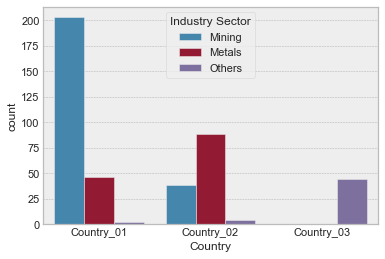

In [106]:
sns.countplot(x="Country", data=data, hue="Industry Sector")

### Inference

#### Analyze Country and Industry Sector
- Country 1 has highest mining industry accidents which indicates that country have high manufacturing related production

<AxesSubplot:xlabel='Country', ylabel='count'>

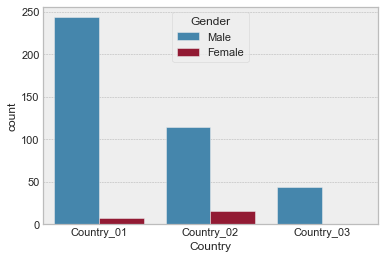

In [107]:
sns.countplot(x="Country", data=data,hue="Gender")

<AxesSubplot:xlabel='Employee type', ylabel='count'>

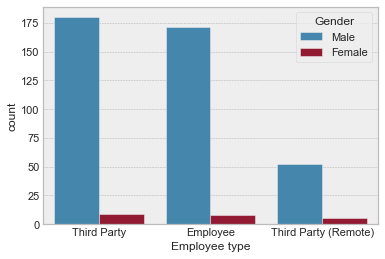

In [108]:
sns.countplot(x="Employee type", data=data,hue="Gender")

### Inference

#### Analyze Country,Employee type and Gender

- The above 2 charts confirms our hypothesis that the count of female employees across different sector/country/ employee type are very low compared to males

<AxesSubplot:xlabel='Potential Accident Level', ylabel='count'>

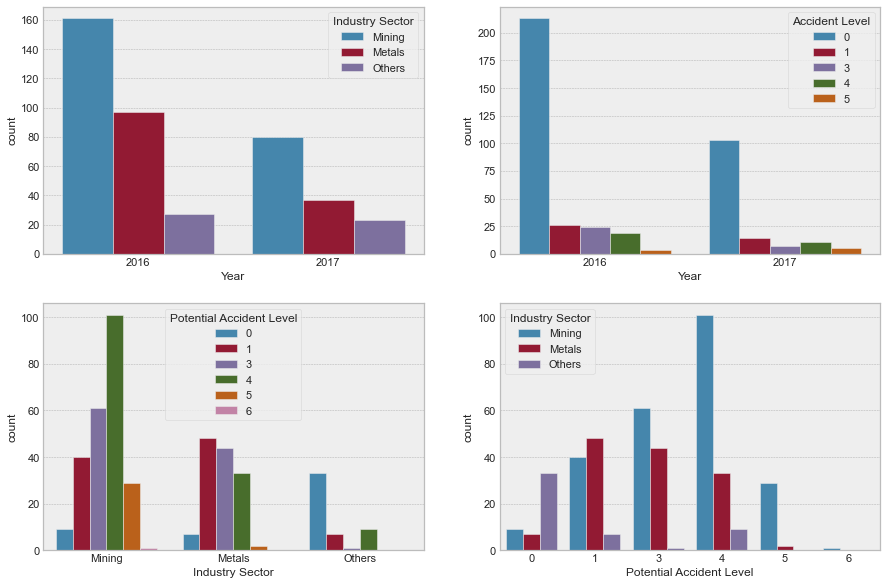

In [109]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=data['Year'],hue='Industry Sector',data=data,ax=axs[0][0])
sns.countplot(x=data['Year'],hue='Accident Level',data=data,ax=axs[0][1])
sns.countplot(x=data['Industry Sector'],hue='Potential Accident Level',data=data,ax=axs[1][0])
sns.countplot(x=data['Potential Accident Level'],hue='Industry Sector',data=data,ax=axs[1][1])

### Inference

- The distribution of accidents across year, sector & potential accident level summarizes the individual insights gained above such as Mining is the highest risk sector with accident level of 0 to 5. Also the year 2016 saw great number of accidents compared to 2017. 

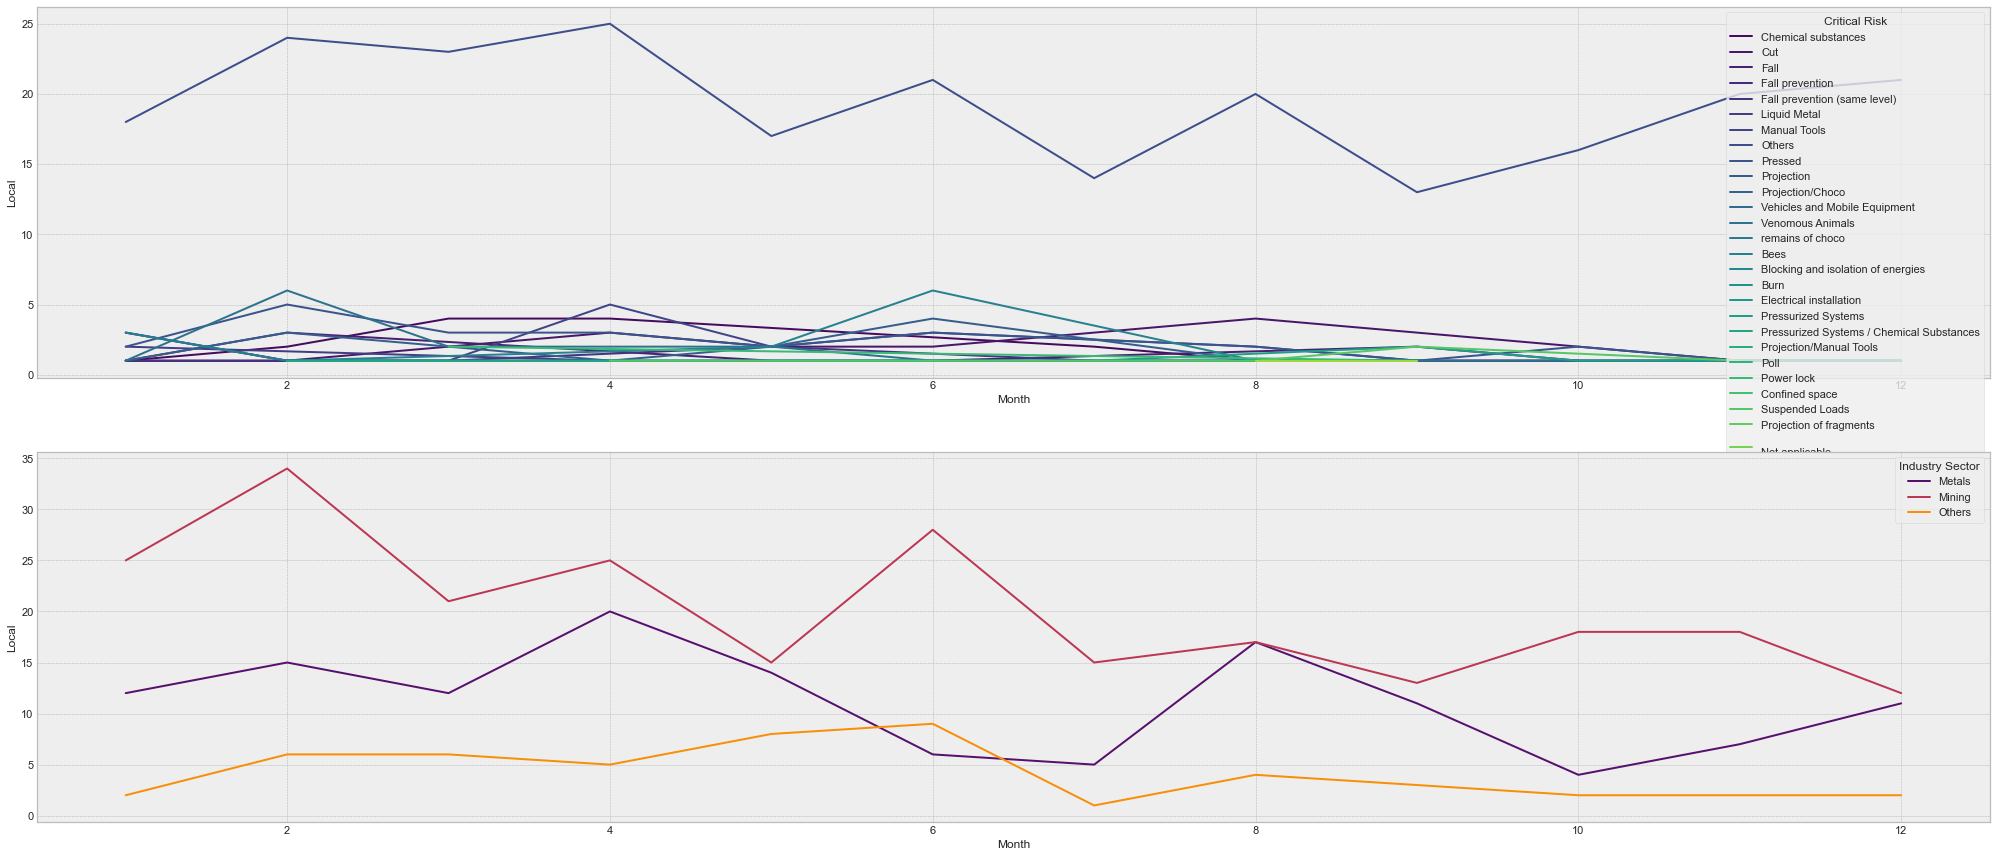

In [110]:
def groupby_and_count(df, group_cols, agg_cols, agg):
  temp = df.groupby(group_cols).agg(dict(zip(agg_cols, agg)))
  return temp

fig, ax = plt.subplots(2,1, figsize=(35,15));
sns.lineplot(data=groupby_and_count(data, ['Month', 'Critical Risk'], ['Local'], ['count']), x="Month", y="Local", hue="Critical Risk", ax=ax[0], palette="viridis");
sns.lineplot(data=groupby_and_count(data, ['Month', 'Industry Sector'], ['Local'], ['count']), x="Month", y="Local", hue="Industry Sector", ax=ax[1], palette="inferno");

### Inference

#### Analysis of activities by Critical Risk and Industry type by Months

- Spike in bees/venomous animal bites during the Summer and Autumn

- Most incidents have occured in the first half of the years and reduced drastically in July which is when Winter starts. When cold weather causes barometric pressure to drop, methane gas can migrate more easily into the mine atmosphere, increasing the risk of an explosion. Dry winter air means drier conditions underground, making it more likely for coal dust to suspend in the mine's atmosphere and create the potential for an explosion.

- We also see a drop in mining activities starting July.

- November has the lowest number of incidents possibly because the rainy season starts then.

## Analyzing text statistics

<AxesSubplot:>

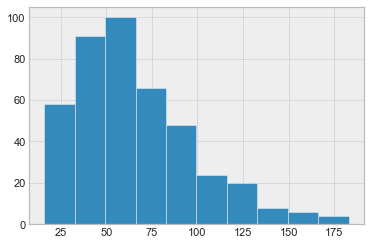

In [111]:
data['Description'].str.split().map(lambda x: len(x)).hist()

### Inference

- Most description have avg words of 50 to 100 but it goes as high as 180 words 

<AxesSubplot:>

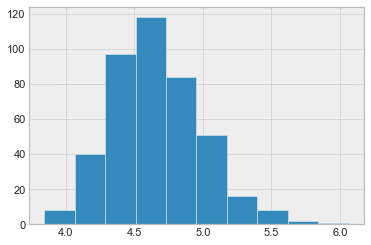

In [112]:
data['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

### Inference

#### Average word length

- Most words have average length of ~5

### Data preprocessing 

In [113]:
data.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday
1,2016-02-01,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday
2,2016-06-01,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday
3,2016-08-01,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday
4,2016-10-01,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday


#### Label encoding to convert as numerical values

- Since need to have labels that should be capable of using in for loop, lets perform labelencoding - like Potential Accident Level to covert Roman char to numbers

In [114]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
df = np.array(ct.fit_transform(data))
df

array([[1.0, 0.0, 0.0, ..., 1, 1, 'Friday'],
       [0.0, 1.0, 0.0, ..., 2, 1, 'Monday'],
       [1.0, 0.0, 0.0, ..., 6, 1, 'Wednesday'],
       ...,
       [0.0, 1.0, 0.0, ..., 5, 7, 'Sunday'],
       [0.0, 1.0, 0.0, ..., 6, 7, 'Wednesday'],
       [1.0, 0.0, 0.0, ..., 9, 7, 'Thursday']], dtype=object)

In [115]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data['Potential Accident Level']=le.fit_transform(data['Potential Accident Level']).astype(np.int8)
# data['Country']=le.fit_transform(data['Country']).astype(np.int8)
data['Gender']=le.fit_transform(data['Gender']).astype(np.int8)
# data['Employee type']=le.fit_transform(data['Employee type']).astype(np.int8)
data['Critical Risk']=le.fit_transform(data['Critical Risk']).astype(np.int8)
data['Accident Level']=le.fit_transform(data['Accident Level']).astype(np.int8)
data['Industry Sector']=le.fit_transform(data['Industry Sector']).astype(np.int8)
data['Local']=le.fit_transform(data['Local']).astype(np.int8)

- onehot encoding using dummies approach on country to aviod some sort of hierarchy/order issue on label encoding

In [116]:
# creating initial dataframe
dum_df = pd.DataFrame(data, columns=['Country','Employee type'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(dum_df, columns=["Country","Employee type"], prefix=["Type_is","Etype_is"] )
# # merge with main df bridge_df on key values
data = data.join(dum_df)
data.head(10)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,2016-01-01,Country_01,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,1,0,0,0,1,0
1,2016-02-01,Country_02,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,2,1,Monday,0,1,0,1,0,0
2,2016-06-01,Country_01,2,1,0,2,1,Third Party (Remote),15,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,1,0,0,0,0,1
3,2016-08-01,Country_01,3,1,0,0,1,Third Party,16,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,1,0,0,0,1,0
4,2016-10-01,Country_01,3,1,3,3,1,Third Party,16,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,1,0,0,0,1,0
5,2016-12-01,Country_02,4,0,0,2,1,Third Party (Remote),21,During the unloading operation of the ustulado...,2016,12,1,Thursday,0,1,0,0,0,1
6,2016-01-16,Country_02,4,0,0,2,1,Employee,11,The collaborator reports that he was on street...,2016,1,16,Saturday,0,1,0,1,0,0
7,2016-01-17,Country_01,3,1,0,2,1,Third Party,20,"At approximately 04:50 p.m., when the mechanic...",2016,1,17,Sunday,1,0,0,0,1,0
8,2016-01-19,Country_02,1,1,0,3,1,Third Party (Remote),16,Employee was sitting in the resting area at le...,2016,1,19,Tuesday,0,1,0,0,0,1
9,2016-01-26,Country_01,5,0,0,1,1,Third Party,4,At the moment the forklift operator went to ma...,2016,1,26,Tuesday,1,0,0,0,1,0


In [117]:
#dropping Country column
data.drop(["Country"], axis=1, inplace=True)
data.head(3)

,Date,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,2016-01-01,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,1,0,0,0,1,0
1,2016-02-01,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,2,1,Monday,0,1,0,1,0,0
2,2016-06-01,2,1,0,2,1,Third Party (Remote),15,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,1,0,0,0,0,1


In [118]:
#Function definition to generate Word cloud 
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

def show_wordcloud(data,bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        stopwords=stopwords,
        max_words=100,
        colormap='ocean_r',
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data).lower())

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    print(wordcloud.words_.keys())

#### words in each Potential Accident Levels


Potential Accident Level:  0


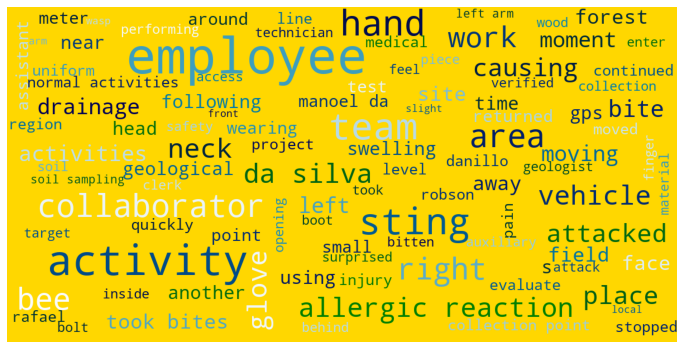

dict_keys(['employee', 'activity', 'team', 'sting', 'hand', 'area', 'collaborator', 'bee', 'right', 'work', 'vehicle', 'neck', 'glove', 'da silva', 'allergic reaction', 'causing', 'attacked', 'place', 'bite', 'moving', 'left', 'drainage', 'activities', 'moment', 'field', 'face', 'away', 'site', 'forest', 'took bites', 'swelling', 'using', 'time', 'another', 'near', 'head', 'gps', 'geological', 'following', 's', 'around', 'small', 'point', 'test', 'assistant', 'meter', 'returned', 'wearing', 'manoel da', 'project', 'level', 'region', 'uniform', 'injury', 'pain', 'line', 'continued', 'robson', 'rafael', 'danillo', 'stopped', 'evaluate', 'medical', 'moved', 'quickly', 'collection point', 'normal activities', 'target', 'inside', 'soil', 'bitten', 'feel', 'opening', 'technician', 'performing', 'took', 'collection', 'behind', 'surprised', 'attack', 'finger', 'piece', 'material', 'boot', 'safety', 'bolt', 'auxiliary', 'wood', 'geologist', 'access', 'clerk', 'enter', 'verified', 'soil sampling

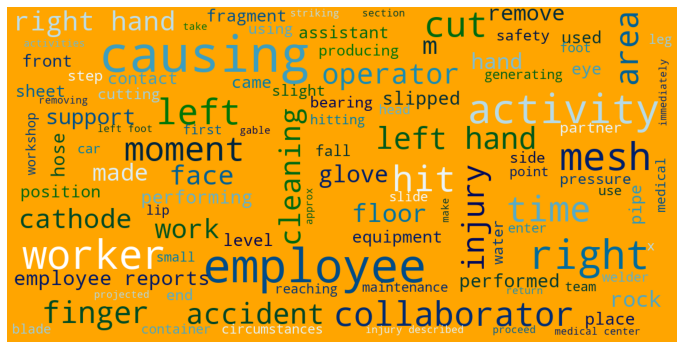

dict_keys(['causing', 'employee', 'activity', 'right', 'worker', 'mesh', 'hit', 'cut', 'left', 'time', 'collaborator', 'moment', 'area', 'injury', 'finger', 'left hand', 'cleaning', 'operator', 'accident', 'cathode', 'face', 'work', 'right hand', 'm', 'floor', 'made', 'glove', 'hand', 'remove', 'rock', 'support', 'employee reports', 'slipped', 'performed', 'performing', 'hose', 'assistant', 'sheet', 'place', 'equipment', 'front', 'used', 'position', 'level', 'fragment', 'contact', 'came', 'eye', 'pipe', 'side', 'step', 'fall', 'slight', 'producing', 'using', 'safety', 'pressure', 'end', 'water', 'partner', 'bearing', 'cutting', 'foot', 'generating', 'first', 'maintenance', 'team', 'medical', 'circumstances', 'head', 'point', 'enter', 'lip', 'slide', 'use', 'hitting', 'x', 'small', 'reaching', 'container', 'leg', 'welder', 'workshop', 'car', 'blade', 'injury described', 'left foot', 'medical center', 'immediately', 'take', 'removing', 'approx', 'section', 'striking', 'activities', 'proc

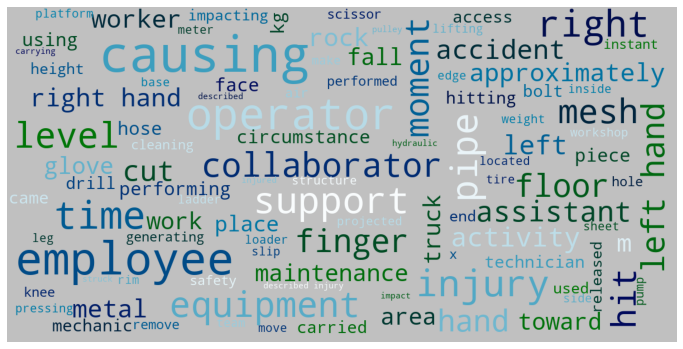

dict_keys(['causing', 'employee', 'operator', 'time', 'right', 'injury', 'pipe', 'support', 'level', 'equipment', 'collaborator', 'mesh', 'moment', 'hit', 'finger', 'floor', 'left hand', 'hand', 'assistant', 'cut', 'left', 'activity', 'accident', 'approximately', 'm', 'metal', 'rock', 'worker', 'right hand', 'maintenance', 'work', 'toward', 'area', 'glove', 'truck', 'fall', 'place', 'performing', 'hose', 'face', 'using', 'piece', 'kg', 'circumstance', 'mechanic', 'access', 'came', 'carried', 'hitting', 'drill', 'bolt', 'technician', 'used', 'released', 'impacting', 'height', 'end', 'generating', 'performed', 'knee', 'remove', 'instant', 'cleaning', 'hole', 'air', 'scissor', 'x', 'safety', 'lifting', 'tire', 'loader', 'platform', 'structure', 'leg', 'base', 'projected', 'pressing', 'move', 'rim', 'make', 'side', 'slip', 'weight', 'team', 'edge', 'sheet', 'inside', 'workshop', 'ladder', 'located', 'pump', 'meter', 'described injury', 'pulley', 'struck', 'injured', 'hydraulic', 'impact', 

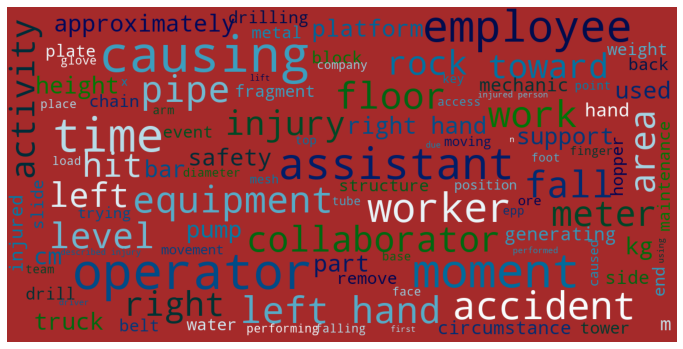

dict_keys(['causing', 'operator', 'time', 'moment', 'employee', 'assistant', 'worker', 'accident', 'work', 'equipment', 'fall', 'left hand', 'floor', 'pipe', 'area', 'collaborator', 'level', 'meter', 'injury', 'right', 'toward', 'hit', 'activity', 'rock', 'left', 'approximately', 'height', 'platform', 'right hand', 'part', 'safety', 'truck', 'support', 'kg', 'used', 'cm', 'pump', 'bar', 'circumstance', 'mechanic', 'side', 'm', 'hand', 'generating', 'injured', 'fragment', 'end', 'drilling', 'plate', 'drill', 'structure', 'block', 'weight', 'back', 'remove', 'maintenance', 'belt', 'hopper', 'water', 'event', 'metal', 'slide', 'chain', 'tower', 'trying', 'position', 'ore', 'movement', 'caused', 'moving', 'performing', 'finger', 'point', 'falling', 'mesh', 'epp', 'tube', 'company', 'access', 'team', 'load', 'face', 'x', 'arm', 'key', 'base', 'foot', 'top', 'diameter', 'place', 'glove', 'described injury', 'injured person', 'driver', 'lift', 'first', 'using', 'performed', 'due', 'n'])

Pote

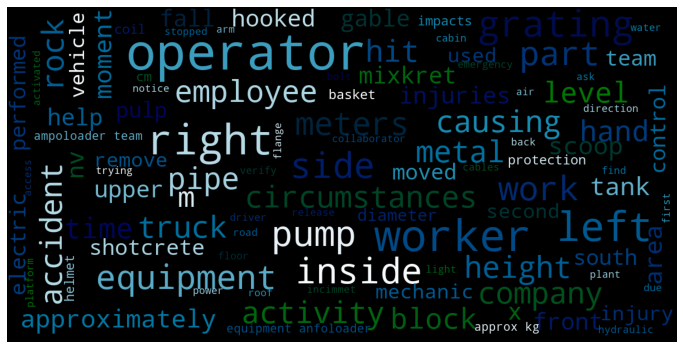

dict_keys(['operator', 'worker', 'right', 'left', 'grating', 'side', 'pump', 'inside', 'equipment', 'part', 'work', 'meters', 'rock', 'accident', 'pipe', 'activity', 'causing', 'circumstances', 'hit', 'height', 'company', 'truck', 'employee', 'metal', 'm', 'time', 'level', 'block', 'hand', 'approximately', 'area', 'moment', 'scoop', 'tank', 'nv', 'mixkret', 'help', 'injuries', 'front', 'upper', 'gable', 'x', 'hooked', 'fall', 'shotcrete', 'moved', 'performed', 'pulp', 'south', 'control', 'team', 'electric', 'mechanic', 'vehicle', 'remove', 'injury', 'second', 'used', 'diameter', 'protection', 'cm', 'impacts', 'helmet', 'basket', 'coil', 'equipment anfoloader', 'approx kg', 'ampoloader team', 'release', 'due', 'water', 'roof', 'verify', 'ask', 'emergency', 'activated', 'collaborator', 'flange', 'air', 'first', 'incimmet', 'direction', 'plant', 'cabin', 'cables', 'power', 'floor', 'driver', 'find', 'light', 'notice', 'trying', 'stopped', 'arm', 'road', 'bolt', 'hydraulic', 'platform', 'a

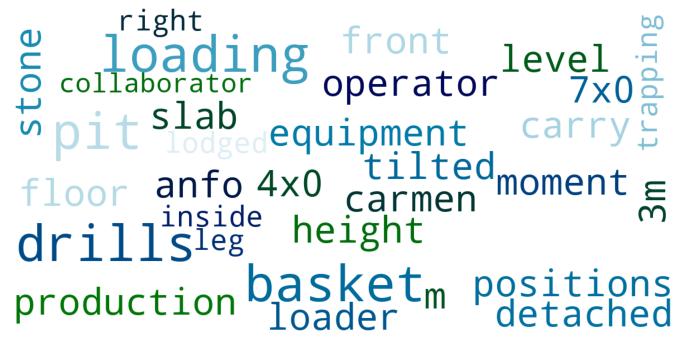

dict_keys(['loading', 'drills', 'pit', 'basket', 'process', 'carmen', 'level', 'operator', 'positions', 'anfo', 'loader', 'equipment', 'height', '3m', 'floor', 'carry', 'production', 'moment', 'stone', 'slab', '4x0', '7x0', 'm', 'detached', 'front', 'tilted', 'lodged', 'inside', 'trapping', 'right', 'leg', 'collaborator'])


In [119]:
#function call for word cloud & print each Potential Accident Level words

bg_color=['gold','orange','silver','brown','black','white']   

# cloud={}
for i in range(0,6):  
   corpus=[]
   print('\nPotential Accident Level: ',i)
   for j in data[data['Potential Accident Level']==i].index:
       corpus= ' '.join([data['Description'][j],str(corpus)])
   show_wordcloud(corpus,bg_color[i])

### Data preparation to be used for AIML model learning

In [120]:
data.head(2)

,Date,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,Type_is_Country_01,Type_is_Country_02,Type_is_Country_03,Etype_is_Employee,Etype_is_Third Party,Etype_is_Third Party (Remote)
0,2016-01-01,0,1,0,3,1,Third Party,20,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,1,0,0,0,1,0
1,2016-02-01,1,1,0,3,1,Employee,21,During the activation of a sodium sulphide pum...,2016,2,1,Monday,0,1,0,1,0,0


* import the required field for further NLP processing & model generation

In [121]:
data[['Description','Potential Accident Level']].to_csv("milestone1_dataset.csv",index=False)

In [122]:
data_m1=pd.read_csv("milestone1_dataset.csv")

In [123]:
data_m1.head(5)

,Description,Potential Accident Level
0,While removing the drill rod of the Jumbo 08 f...,3
1,During the activation of a sodium sulphide pum...,3
2,In the sub-station MILPO located at level +170...,2
3,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,Approximately at 11:45 a.m. in circumstances t...,3


## 2. Milestone

#### ‣ Input: Output of milestone 

    1 ‣ Process:
        ‣ Step 1: NLP pre processing
        ‣ Step 2: Design, train and test machine learning classifiers
        ‣ Step 3: Design, train and test Neural networks classifiers
        ‣ Step 4: Design, train and test RNN or LSTM classifiers
        ‣ Step 5: Choose the best performing model classifier and pickle it.
        ‣ Output: Pickled model to be used for future prediction
    ‣ Submission: Interim report

In [124]:
import pandas as pd
import numpy as np
data_m1=pd.read_csv("milestone1_dataset.csv")

In [125]:
import plotly
print(plotly.__version__)

5.5.0


In [126]:
import random

import nltk
from nltk import ngrams
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# import lightgbm as lgb
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier

# import tensorflow as tf
# from tensorflow.keras import regularizers, optimizers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalMaxPool2D, BatchNormalization, MaxPool2D, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding
# from tensorflow.keras.optimizers import Adam, SGD
# from numpy import expand_dims
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint


from collections import Counter
from word2number import w2n

random.seed(42)
%matplotlib inline

# Charting options
import seaborn as sns
sns.set(context= "notebook", color_codes=True)
from matplotlib import pyplot as plt
plt.style.use('bmh')
# Set notebook mode to work in offline
# pyo.init_notebook_mode()

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

roman_numerals = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6, 'VII': 7, 'VIII': 8, 'IX': 9, 'X': 10}

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SESA277092\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SESA277092\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SESA277092\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [127]:
df = pd.read_csv('milestone1_dataset.csv')
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.head()

,description,potential_accident_level
0,While removing the drill rod of the Jumbo 08 f...,3
1,During the activation of a sodium sulphide pum...,3
2,In the sub-station MILPO located at level +170...,2
3,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,Approximately at 11:45 a.m. in circumstances t...,3


# Data Preprocessing

In [128]:
stop_word_list = list(set(stopwords.words('english'))) # Load standard stop words
stopword_pattern = re.compile(r'\b(' + r'|'.join(stop_word_list) + r')\b\s*') # Compile regex to remove stopwords
df['desc'] = df['description'].str.lower().str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.replace('mx', 'm x ').str.replace(stopword_pattern, ' ', regex=True) # Replace 10cmx20cm to 10cm x 20cm
df['desc'] = df['desc'].str.split(' ')

# Convert words to numbers
def convert_numbers(x):
  new_x = []
  for word in x:
    try:
      word = w2n.word_to_num(word.lower())
    except Exception as e:
      word = word.lower()
    if len(str(word)) > 0: # If the length of the word is zero, then don't return
      new_x.append(str(word))
  return ' '.join(new_x)

df['desc'] = df['desc'].apply(convert_numbers)

# High frequency occuring bigram removal
bigram_stop_pattern = "(i?)(left hand|left foot|left leg|left arm|right hand|right leg|right foot|right arm|time accident|causing the injury|caused the injury|caused injury|causing injury)+"
df["desc"] = df["desc"].str.replace(bigram_stop_pattern, '', regex=True)

# Convert any dimensions like 10cm x 20cm x 30cm to xdimension
dimension_pattern = re.compile(r"(i?)((([\d.]+)\s{0,}(cm|m)\s{0,})+(\s{0,}[x|X]\s{0,}\b|\b))+")
df["desc"] = df["desc"].str.replace(dimension_pattern, ' xdimension ', regex=True)

# Convert weights to xweight
weight_pattern = re.compile(r"(?i)([\d.]+)\s{0,}(lb(s\b|\b)|pound(s\b|\b)|ton(s\b|\b)|kilogram(s\b|\b)|gram(s\b|\b)|ounce(s\b|\b)|oz(s\b|\b)|g(s\b|\b)|gr(s\b|\b)|kg(s\b|\b)|tn(s\b|\b))")
df["desc"] = df["desc"].str.replace(weight_pattern, ' xweight ', regex=True)

# Convert lenghts/heights to xlength
lenght_pattern = re.compile(r"(?i)([\d.]+)\s{0,}(millimeter(s\b|\b)|centimeter(s\b|\b)|meter(s\b|\b)|kilometer(s\b|\b)|mm(s\b|\b)|cm(s\b|\b)|m(s\b|\b)|km(s\b|\b)|mt(s\b|\b)|inch|inches|yard(s\b|\b))")
df["desc"] = df["desc"].str.replace(lenght_pattern, ' xlength ', regex=True)

df['desc'] = df['desc'].str.split(' ')

### Preprocessing before lemmatization

- Any words that represent a number like three or one are converted to their numerical form.

- Bigrams that appear very frequently like left hand, right foot, etc. are removed.

- Any dimensions like 10cm x 20cm x 30cm or 3m x 6m are converted to a string xdimension

- Any words representing weights like 30gm or 152lbs are converted to a string xweight

- Any words representing lengths or depths like 5 kilometers or 1 inch are converted to a string xlength



In [129]:
df.head()

,description,potential_accident_level,desc
0,While removing the drill rod of the Jumbo 08 f...,3,"[removing, drill, rod, jumbo, 8, maintenance, ..."
1,During the activation of a sodium sulphide pum...,3,"[activation, sodium, sulphide, pump, piping, u..."
2,In the sub-station MILPO located at level +170...,2,"[substation, milpo, located, level, 170, colla..."
3,Being 9:45 am. approximately in the Nv. 1880 C...,0,"[945, approximately, nv, 1880, cx695, ob7, per..."
4,Approximately at 11:45 a.m. in circumstances t...,3,"[approximately, 1145, circumstances, mechanics..."


In [130]:
df_conversion_dict = df

lemma = WordNetLemmatizer()
def convert_words(word): # Word corrections in case of typing mistakes
  if word in df_conversion_dict:
    return df_conversion_dict[word]
  else:
    return word

def stop_word_removal(word): # Remove any stopwords
  if word not in stop_word_list:
    return word
  else:
    return ''

def data_preprocessing(word): # Chain all functions together to perform the data preprocessing
  word = word.lower()
  word = convert_words(word)
  word = lemma.lemmatize(word, 'v')
  if word.isnumeric():
    return ''
  return word

In [131]:
df['desc'] = df['desc'].apply(lambda x: [data_preprocessing(i) for i in x if len(data_preprocessing(i)) > 0])
df['len'] = df['desc'].apply(len)

In [132]:
words_all = dict(Counter([data_preprocessing(word) for word in sum(df['desc'].to_list(), []) if len(word) > 0]))
ngram_words = dict(Counter(list(ngrams([word.lower() for word in sum(df['desc'].to_list(), []) if len(word) > 0], 2)))) # Get a list of all bigrams and the count of their frequency

In [133]:
ngram_words_sorted = [(k,v) for k,v in ngram_words.items() if v >= 160]
ngram_words_sorted.sort(key = lambda x: x[1], reverse=True)

In [134]:
df['desc_split'] = df['desc']
df['desc'] = df['desc'].str.join(' ')


In [135]:
vectorizer = CountVectorizer(ngram_range=(1,1))
df_vectorized = vectorizer.fit_transform(df['desc'])

In [136]:
tf_vec = df_vectorized.toarray()
normalized_tf = tf_vec[2] / np.sqrt(np.sum(tf_vec[2]**2))
tfidf = TfidfTransformer(use_idf=False, norm='l2', smooth_idf=False)
tf_normalized = tfidf.fit_transform(tf_vec)

In [137]:
df_countVec = pd.concat([df[['potential_accident_level']], pd.DataFrame(df_vectorized.toarray())], axis=1) # Concatenate the potential_accident_level with CountVectorizer matrix
df_tfidf = pd.concat([df[['potential_accident_level']], pd.DataFrame(tf_normalized.toarray())], axis=1) # Concatenate the potential_accident_level with Tf-Idf matrix

In [138]:
X_countVec = df_countVec.drop(columns=['potential_accident_level'])
y_countVec = df_countVec[['potential_accident_level']]

X_tfidf = df_tfidf.drop(columns=['potential_accident_level'])
y_tfidf = df_tfidf[['potential_accident_level']]

In [139]:
y_countVec['potential_accident_level']

0      3
1      3
2      2
3      0
4      3
      ..
420    2
421    1
422    1
423    1
424    1
Name: potential_accident_level, Length: 425, dtype: int64

In [140]:
y_conv_countVec = pd.get_dummies(y_countVec['potential_accident_level'])
y_conv_tfidf = pd.get_dummies(y_tfidf['potential_accident_level'])

In [75]:
y_conv_countVec

,0,1,2,3,4,5
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
420,0,0,1,0,0,0
421,0,1,0,0,0,0
422,0,1,0,0,0,0
423,0,1,0,0,0,0


Split the count vectorized and Tf-Idf matrix into their respective training and testing datasets

In [141]:
X_countVec_train, X_countVec_test, y_countVec_train, y_countVec_test = train_test_split(X_countVec, y_countVec, test_size=0.3, random_state=42)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.3, random_state=42)

In [142]:
X_countVec

,0,1,2,3,4,5,6,7,8,9,...,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train ML Classifiers

In [78]:
encoded_cols = {ix:i for ix,i in enumerate(vectorizer.get_feature_names())}

y_test_conv = pd.get_dummies(y_countVec_test)
classes = y_test_conv.columns
classes = [i.replace('critical_risk_', '') for i in classes]
label_mapping = {i:ix for ix, i in enumerate(classes)}

def train_ml_classifier(df, clf, X_train, y_train, X_test, y_test, overfit_check=False, model_name=''):
  clf.fit(X_train, y_train)  

  y_pred=clf.predict(X_train)
  print(f"Train score: {round(accuracy_score(y_train, y_pred) * 100)} %")
  if overfit_check:
    print(clf)
    print("Training Classification report: \n{}\n".format(
      classification_report(y_train, y_pred)))
  
  y_pred=clf.predict(X_test)
  print("Testing Classification report: \n{}\n".format(
    classification_report(y_test, y_pred)))
  
  
  cols = list(df.columns)
  cols.remove('potential_accident_level')
  cols = [encoded_cols[col] if col in encoded_cols else col[:8] + '\n' + col[8:] for col in cols]

  try:
    clf.feature_importances_
    plt.figure(figsize=(35,5));
    sns.barplot(data=pd.DataFrame(dict(zip(cols,clf.feature_importances_)), index=[1]).T.reset_index().sort_values(1, ascending=False).head(30), x="index", y=1, palette='cividis');
  except:
    pass

  act_pred_df = pd.DataFrame({'Actual' : y_test['potential_accident_level'].to_numpy(), 'Predicted' : y_pred})
  act_pred_df['Model'] = model_name
  act_pred_df['Actual'] = act_pred_df['Actual'].replace(label_mapping)
  act_pred_df['Predicted'] = act_pred_df['Predicted'].replace(label_mapping)

  return clf, y_pred, act_pred_df

## LightGBMClassifier

In [ ]:
lgbm_countVec = lgb.LGBMClassifier(learning_rate=0.1, max_depth=2, max_bin=3, num_leaves=5, num_iterations=100,objective='multiclass', 
                          boosting_type='gbdt')
lgbm_countVec, lgbm_countVec_pred, lgbm_countVec_act_pred = train_ml_classifier(df_countVec, lgbm_countVec, X_countVec_train, y_countVec_train, X_countVec_test, y_countVec_test, model_name='LightGBM CountVectorized')

## The LGBM model trained on count vectorizer data performs with below mentioned metrics

- accuracy: %29
- average precision :25%
- recall : 25%
- F1 score : 24%

Train score: 81 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.32      0.19      0.24        32
           2       0.30      0.28      0.29        36
           3       0.32      0.54      0.40        37
           4       0.00      0.00      0.00        10

    accuracy                           0.31       128
   macro avg       0.28      0.26      0.26       128
weighted avg       0.30      0.31      0.29       128




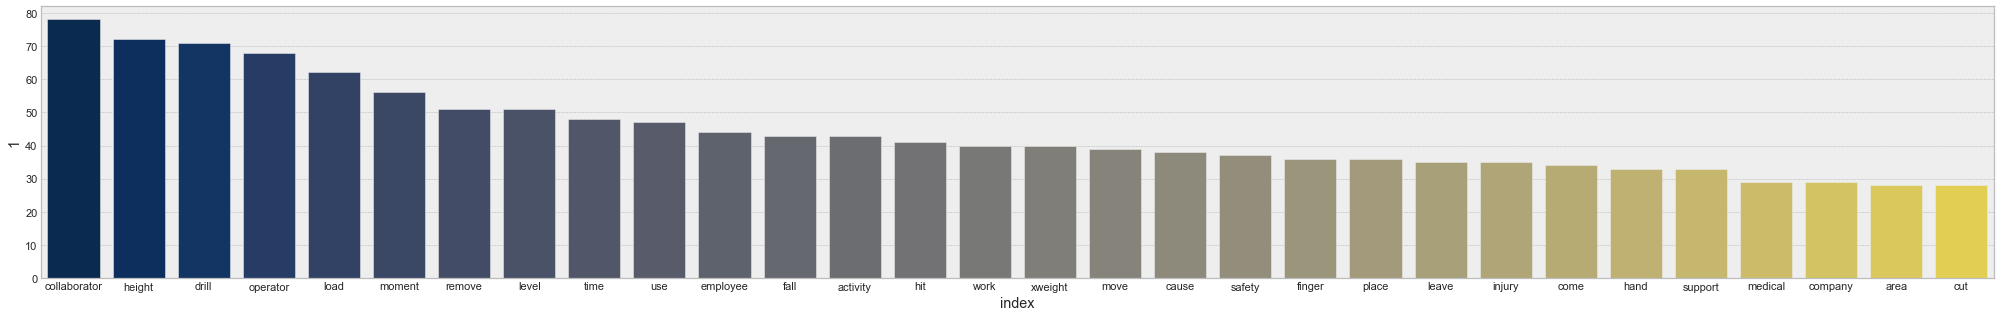

In [75]:
lgbm_tfidf = lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, max_bin=3, num_leaves=5, num_iterations=100,objective='multiclass', 
                          boosting_type='gbdt')
lgbm_tfidf, lgbm_tfidf_pred, lgbm_tfidf_act_pred = train_ml_classifier(df_countVec, lgbm_tfidf, X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test, model_name='LightGBM Tf-Idf')

## The LGBM model trained on TF-IDF data performs with below mentioned metrics

- accuracy: 31%
- average precision :28%
- recall : 26%
- F1 score : 26%

## RandomForest Classifier

Train score: 100 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.43      0.19      0.26        32
           2       0.32      0.17      0.22        36
           3       0.33      0.78      0.46        37
           4       0.00      0.00      0.00        10

    accuracy                           0.37       128
   macro avg       0.41      0.32      0.31       128
weighted avg       0.39      0.37      0.32       128




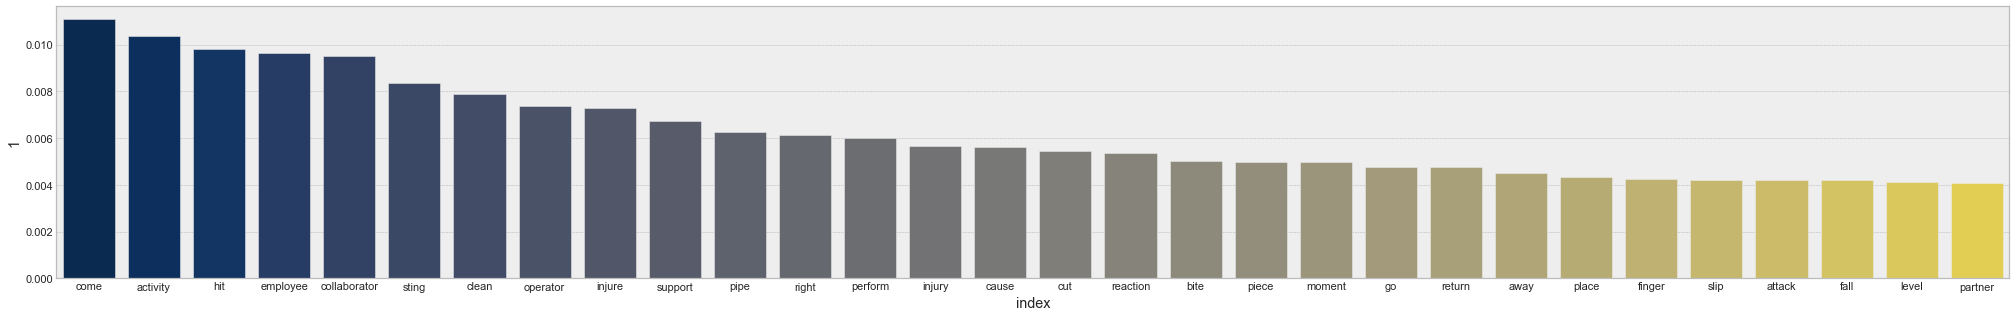

In [76]:
rfc_tfidf = RandomForestClassifier()
rfc_tfidf, rfc_tfidf_pred, rfc_tfidf_act_pred = train_ml_classifier(df_countVec, rfc_tfidf, X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test, model_name='RandomForest Tf-Idf')

## The RF model trained on count vectorizer data performs with below mentioned metrics

- accuracy: 39%
- average precision :44%
- recall : 34%
- F1 score : 33%

In [ ]:
rfc_tfidf = RandomForestClassifier()
rfc_tfidf, rfc_tfidf_pred, rfc_tfidf_act_pred = train_ml_classifier(df_countVec, rfc_tfidf, X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test, model_name='RandomForest Tf-Idf')

## The RF model trained on TF-IDF data performs with below mentioned metrics

    accuracy: 38%
    average precision :42%
    recall : 34%
    F1 score : 34%

## XGBOOST Classifier

[07:04:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 100 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       0.29      0.28      0.29        32
           2       0.30      0.28      0.29        36
           3       0.36      0.54      0.43        37
           4       0.00      0.00      0.00        10

    accuracy                           0.36       128
   macro avg       0.39      0.33      0.34       128
weighted avg       0.36      0.36      0.35       128




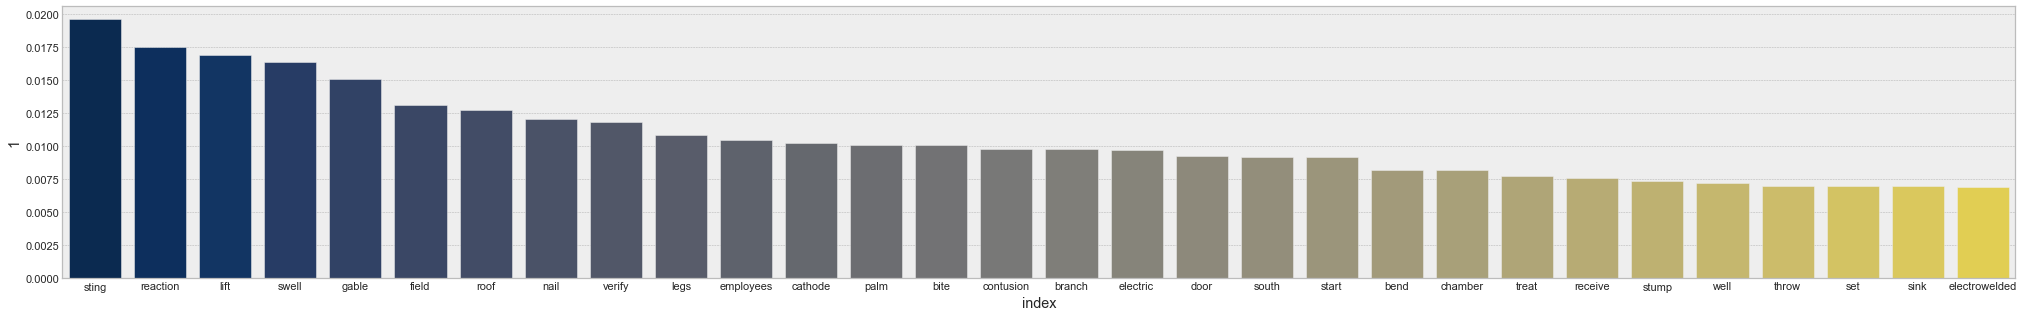

In [78]:
xgb_countVec = XGBClassifier()
xgb_countVec, xgb_countVec_pred, xgb_countVec_act_pred = train_ml_classifier(df_countVec, xgb_countVec, X_countVec_train, y_countVec_train, X_countVec_test, y_countVec_test, model_name='XGBoost CountVectorized')

## The XGB model trained on count vectorizer data performs with below mentioned metrics

- accuracy: 36%
- average precision :39%
- recall : 33%
- F1 score : 34%


[07:04:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 100 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.32      0.28      0.30        32
           2       0.29      0.22      0.25        36
           3       0.40      0.68      0.50        37
           4       0.00      0.00      0.00        10

    accuracy                           0.38       128
   macro avg       0.37      0.33      0.33       128
weighted avg       0.36      0.38      0.35       128




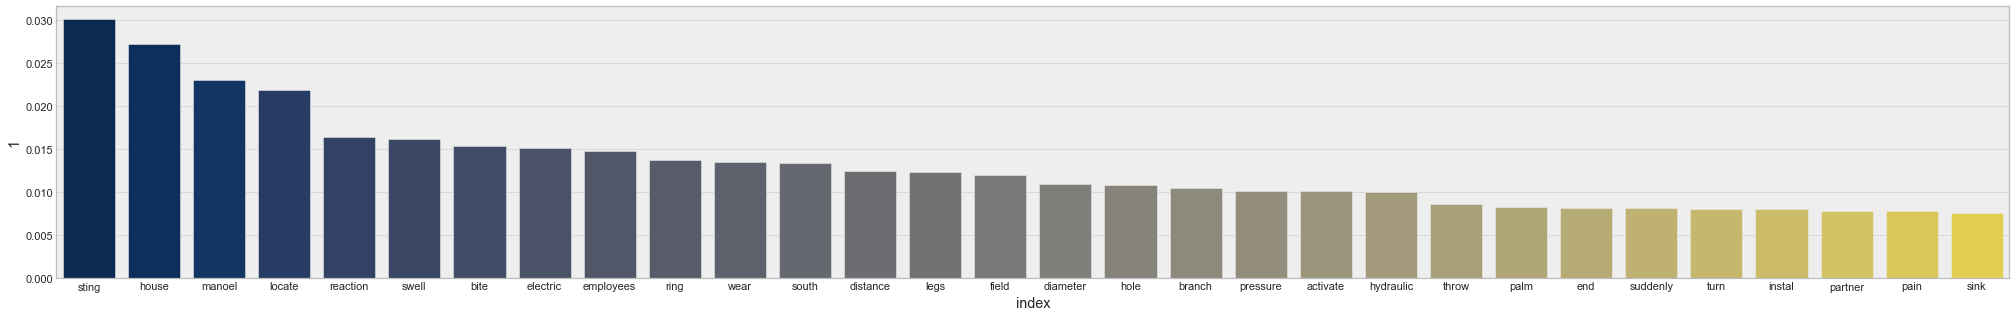

In [79]:
xgb_tfidf = XGBClassifier()
xgb_tfidf, xgb_tfidf_pred, xgb_tfidf_act_pred = train_ml_classifier(df_countVec, xgb_tfidf, X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test, model_name='XGboost Tf-Idf')

## The XGB model trained on TF-IDF data performs with below mentioned metrics

- accuracy: 38%
- average precision :37%
- recall : 33%
- F1 score : 33%

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_countVec = LogisticRegression()
logreg_countVec, logreg_countVec_pred, logreg_countVec_act_pred = train_ml_classifier(df_countVec, logreg_countVec, X_countVec_train, y_countVec_train, X_countVec_test, y_countVec_test, model_name='logreg_CountVectorized')

## The Logistic Regression model trained on count vectorizer data performs with below mentioned metrics

- accuracy: 42%
- average precision :41%
- recall : 36%
- F1 score : 37%

In [81]:
from sklearn.linear_model import LogisticRegression
logreg_tfidf = LogisticRegression()
logreg_tfidf , logreg_tfidf_pred, logreg_tfidf_act_pred = train_ml_classifier(df_countVec, logreg_tfidf, X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test, model_name='logreg_tfidfVectorized')

Train score: 84 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.36      0.16      0.22        32
           2       0.41      0.19      0.26        36
           3       0.32      0.78      0.45        37
           4       0.00      0.00      0.00        10

    accuracy                           0.37       128
   macro avg       0.42      0.32      0.31       128
weighted avg       0.40      0.37      0.32       128




## The Logistic Regression model trained on tfidf vectorizer data performs with below mentioned metrics

- accuracy: 37%
- average precision :42%
- recall : 32%
- F1 score : 31%

## Naive-Bayes

In [82]:
from sklearn.naive_bayes import BernoulliNB
NB_countVec = BernoulliNB()
NB_countVec, NB_countVec_pred, NB_countVec_act_pred = train_ml_classifier(df_countVec, NB_countVec, X_countVec_train, y_countVec_train, X_countVec_test, y_countVec_test, model_name='Naive-Bayes_CountVectorized')

Train score: 74 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.33      0.06      0.11        32
           2       0.25      0.11      0.15        36
           3       0.28      0.78      0.41        37
           4       0.00      0.00      0.00        10

    accuracy                           0.30       128
   macro avg       0.37      0.24      0.21       128
weighted avg       0.34      0.30      0.23       128




## The NB model trained on count vectorizer data performs with below mentioned metrics

- accuracy: 30%
- average precision :37%
- recall : 24%
- F1 score : 21%

In [83]:
NB_tfidf = BernoulliNB()
NB_tfidf, NB_tfidf_pred, NB_tfidf_act_pred = train_ml_classifier(df_countVec, NB_tfidf, X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test, model_name='Naive-Bayes_tfidfVectorized')

Train score: 74 %
Testing Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.33      0.06      0.11        32
           2       0.25      0.11      0.15        36
           3       0.28      0.78      0.41        37
           4       0.00      0.00      0.00        10

    accuracy                           0.30       128
   macro avg       0.37      0.24      0.21       128
weighted avg       0.34      0.30      0.23       128




## The NB  model trained on tfidf vectorizer data performs with below mentioned metrics

- accuracy: 30%
- average precision :37%
- recall : 24
- F1 score : 21%

# Neural network

In [84]:
def build_nn_model(model_layers, optimizer, loss_type):
    model = Sequential()
    for layer in model_layers:
        model.add(layer)
    model.compile(optimizer=optimizer, loss=loss_type, metrics=['accuracy'])
    return model

def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

In [85]:
def train_model(nn_model, target_col, epochs, X, y, lr, momentum):
    num_classes = int(y.nunique())

    y_conv = pd.get_dummies(y[target_col])
    X_train, X_test, y_train, y_test = train_test_split(X, y_conv, test_size=0.3, train_size=0.7, random_state=42)

    print(nn_model.summary())

    model_checkpoint = ModelCheckpoint(f'text_classifier_{target_col}.pkl',
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

    lrs = LearningRateScheduler(lr_scheduler, verbose=1)

    model_history = nn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=16, verbose= 1, callbacks=[model_checkpoint])

    nn_model = tf.keras.models.load_model(f'text_classifier_{target_col}.pkl')

    predictions = nn_model.predict(X_test)
    y_test_conv = pd.get_dummies(y_test)
    label_mapping = np.argmax(y_test_conv.to_numpy(), axis=-1)

    print("Classification report: \n{}\n".format(
        classification_report(label_mapping, np.argmax(predictions, axis=-1))))

    return nn_model, X_train, X_test, y_train, y_test

In [86]:
num_classes = int(y_tfidf.nunique())
nn_model_layers =  [Dense(256, input_shape=(X_tfidf.shape[1],), activation='relu'),
                    Dense(128, activation='relu'),
                    Dropout(0.2),
                    Dense(64, activation='relu'),
                    Dropout(0.3),
                    Dense(32, activation='relu'),
                    Dropout(0.5),
                    Dense(16, activation='relu'),
                    Dense(num_classes, activation='softmax')]
lr = 0.1
momentum = 0.85
epochs = 100
sgd = SGD(lr=lr, momentum=momentum, decay=lr / epochs, nesterov=False)

nn_model = build_nn_model(nn_model_layers, sgd, 'categorical_crossentropy')

target_model, X_train, X_test, y_train, y_test = train_model(nn_model, 'potential_accident_level', epochs, X_tfidf, y_tfidf, lr, momentum)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               633600    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [87]:
ix2label = {ix:i for ix,i in enumerate(y_test.columns)}

In [88]:
ix2label

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [89]:
predictions_NN = target_model.predict(X_test)
y_test_conv = pd.get_dummies(y_test)
label_mapping_NN = np.argmax(y_test.to_numpy(), axis=-1)

print("Classification report: \n{}\n".format(
    classification_report(label_mapping_NN, np.argmax(predictions_NN, axis=-1))))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.35      0.59      0.44        32
           2       0.32      0.22      0.26        36
           3       0.48      0.54      0.51        37
           4       0.00      0.00      0.00        10

    accuracy                           0.41       128
   macro avg       0.43      0.35      0.35       128
weighted avg       0.42      0.41      0.39       128




## The NN model performs with below mentioned metrics

- accuracy: 42%
- average precision :43%
- recall : 35%
- F1 score : 34%

In [90]:
lst2=np.argmax(predictions_NN, axis=-1)
lst3=[]
for i in label_mapping_NN:
  lst3.append("NN")
df_NN=pd.DataFrame(list(zip(label_mapping_NN, lst2,lst3)),
               columns =['Actual', 'Predicted','Model'])

# LSTM

In [91]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

In [92]:
max_features = 50000
maxlen = df.len.max()
embedding_size = 100

In [93]:
maxlen

91

In [94]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df.desc)

In [95]:
# get word index and vectors for all sentences
word_index = tokenizer.word_index
print(word_index)

{'employee': 1, 'cause': 2, 'operator': 3, 'use': 4, 'hit': 5, 'activity': 6, 'work': 7, 'leave': 8, 'perform': 9, 'area': 10, 'xdimension': 11, 'moment': 12, 'equipment': 13, 'finger': 14, 'fall': 15, 'right': 16, 'level': 17, 'support': 18, 'collaborator': 19, 'make': 20, 'pipe': 21, 'move': 22, 'floor': 23, 'xlength': 24, 'assistant': 25, 'place': 26, 'remove': 27, 'worker': 28, 'cut': 29, 'xweight': 30, 'mesh': 31, 'rock': 32, 'time': 33, 'drill': 34, 'hand': 35, 'mr': 36, 'safety': 37, 'injury': 38, 'approximately': 39, 'team': 40, 'position': 41, 'impact': 42, 'height': 43, 'pump': 44, 'part': 45, 'side': 46, 'describe': 47, 'generate': 48, 'injure': 49, 'come': 50, 'truck': 51, 'face': 52, 'clean': 53, 'carry': 54, 'metal': 55, 'circumstances': 56, 'release': 57, 'towards': 58, 'gloves': 59, 'medical': 60, 'return': 61, 'press': 62, 'project': 63, 'open': 64, 'end': 65, 'slip': 66, 'take': 67, 'access': 68, 'platform': 69, 'load': 70, 'fragment': 71, 'maintenance': 72, 'report':

In [96]:
X=df['desc']     #features
y=df['potential_accident_level'] #labels

In [97]:
import string
import nltk
file_p = "".join([char for char in X if char not in string.punctuation])   
#removes all special characters
sents = nltk.sent_tokenize(file_p)
print("The number of sentences is", len(sents)) 
#prints the number of sentences

string.punctuation = string.punctuation + '.'
file_q = "".join([char for char in file_p if char not in string.punctuation])   #removes even periods.
words = nltk.word_tokenize(file_q)
print("The number of tokens is", len(words)) 
#prints the number of tokens

average_tokens = round(len(words)/len(sents))
print("The average number of tokens per sentence is", average_tokens) 
#prints the average number of tokens per sentence

unique_tokens = set(words)
print("The number of unique tokens are", len(unique_tokens)) 
#prints the number of unique tokens

preprocessed_text = file_p.lower()       
#converts corpus into lowercase

The number of sentences is 1
The number of tokens is 12909
The average number of tokens per sentence is 12909
The number of unique tokens are 2815


In [98]:
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size: ", vocab_size)

vocabulary size:  2484


In [99]:
X = tokenizer.texts_to_sequences(df['desc']) # features
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['potential_accident_level']) # labels

In [100]:
print("Number of Samples:", len(X))
print(X[100])
print("Number of Labels: ", len(y))
print(y[100])

Number of Samples: 425
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   49 1631    9   53   53
  836  192  250  590   14   71  162]
Number of Labels:  425
1


In [101]:
# 1. Use Sequential model instance
model = Sequential()
# 2. Adding Embedding layer, 
# model.add(Embedding(vocab_size+1, embedding_size, weights = [embedding_matrix], input_length=maxlen, trainable=False))
model.add(Embedding(vocab_size+1, embedding_size, input_length=maxlen, trainable=False))
# 3. Bidirectional(LSTM) layer
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
# 4. Adding dense and dropout layers as required
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
# 5. In the end add a final dense layer with sigmoid activation for binary classification.
model.add(Dense(1,activation='sigmoid'))
# 6. Adding callbacks
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [102]:
# Compiling the defined model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 91, 100)           248500    
_________________________________________________________________
bidirectional (Bidirectional (None, 91, 256)           234496    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [104]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(340, 91) (340,)
(85, 91) (85,)


In [105]:
# Defining batch size & epochs
batch_size = 32
epochs = 100

In [106]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 3s 116ms/step - loss: 0.0000e+00 - accuracy: 0.1985 - val_loss: 0.0000e+00 - val_accuracy: 0.2206
Epoch 2/100
9/9 [==============================] - 1s 67ms/step - loss: 0.0000e+00 - accuracy: 0.2022 - val_loss: 0.0000e+00 - val_accuracy: 0.2206
Epoch 3/100
9/9 [==============================] - 1s 60ms/step - loss: 0.0000e+00 - accuracy: 0.2022 - val_loss: 0.0000e+00 - val_accuracy: 0.2206
Epoch 4/100
9/9 [==============================] - 1s 66ms/step - loss: 0.0000e+00 - accuracy: 0.2022 - val_loss: 0.0000e+00 - val_accuracy: 0.2206
Epoch 00004: early stopping


In [107]:
# Evaluating the trained model on test set
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
loss, accuracy

(0.0, 0.29411765933036804)

In [108]:
# Analysing classification report with Precision,Recall & F1 score.
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (model.predict(x_test)>0.5).astype(int)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.29      0.45        85
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.29        85
   macro avg       0.20      0.06      0.09        85
weighted avg       1.00      0.29      0.45        85



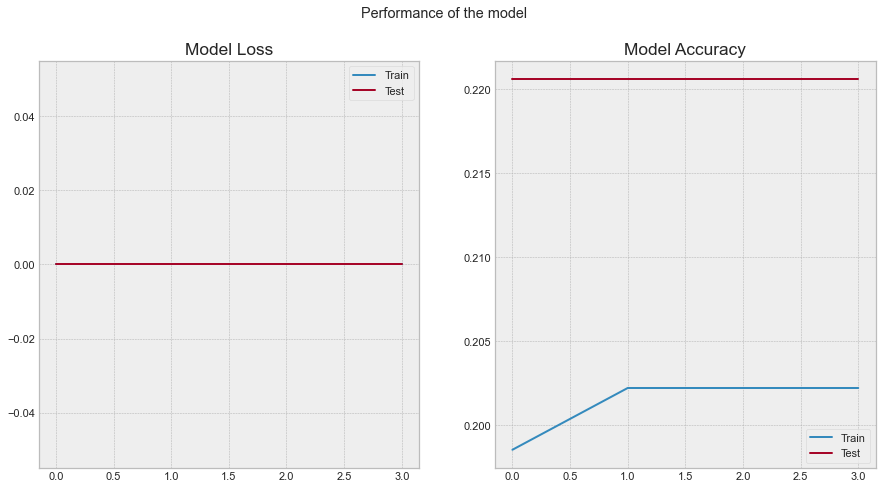

In [109]:
#Visualizing Loss / Accuracy performance for  training and testing data

import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.5))
f.suptitle('Performance of the model')

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['accuracy'], label = 'Train')
ax2.plot(history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

# XLNET

In [18]:
# copy the data 
data_copy = data.copy()
# take only descritpion and potential accident data
data_copy = data_copy[['Description','Potential Accident Level']]

data_copy['Potential Accident Level'] = data_copy['Potential Accident Level'].astype('category').cat.codes

In [20]:
data_copy

,Description,Potential Accident Level
0,While removing the drill rod of the Jumbo 08 f...,3
1,During the activation of a sodium sulphide pum...,3
2,In the sub-station MILPO located at level +170...,2
3,Being 9:45 am. approximately in the Nv. 1880 C...,0
4,Approximately at 11:45 a.m. in circumstances t...,3
...,...,...
420,"Being approximately 5:00 a.m. approximately, w...",2
421,The collaborator moved from the infrastructure...,1
422,During the environmental monitoring activity i...,1
423,The Employee performed the activity of strippi...,1


In [22]:
# Check unique classes 
data_copy['Potential Accident Level'].unique()

array([3, 2, 0, 1, 4, 5], dtype=int8)

In [24]:
data_copy.columns = ['text','label']

In [26]:
#  there is olny one data for leel 5..it can be removed 
data_copy.drop(data_copy[data_copy['label'] == 5].index, inplace = True)
data_copy['label'].value_counts()

3    143
2    106
1     95
0     49
4     31
Name: label, dtype: int64

In [28]:
from nltk.corpus import wordnet
# Define a function to find synonyms of words in a text. 
def get_synonyms(word):
    
    synonyms = set()
    
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)

In [30]:
import random

# Once the synonym is generated, we’ll define a function to replace the words in a sentence with their synonyms for a specified number of examples. 
def synonym_replacement(words, n):
    
    words = words.split()
    
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)

    return sentence

In [32]:
data_aug = data_copy.copy()

In [34]:
data_aug['label'].value_counts()

3    143
2    106
1     95
0     49
4     31
Name: label, dtype: int64

In [ ]:
augmented_sentences=[]
augmented_sentences_labels=[]


# Generate synthesized data for minority classes (II, III, IV and V) using the synonym_replacement(words, n) function.
for i in data_aug.index:
  if data_aug['label'][i]==0:  # Accident Level II
    for n in range(1):
      temps=synonym_replacement(data_aug['text'][i],n)
      augmented_sentences.append(temps)
      augmented_sentences_labels.append(data_aug['label'][i])
  elif data_aug['label'][i]==4:  # Accident Level IV
    for n in range(3):
      temps=synonym_replacement(data_aug['text'][i],n)
      augmented_sentences.append(temps)
      augmented_sentences_labels.append(data_aug['label'][i])

In [93]:
df_countVec

,potential_accident_level,0,1,2,3,4,5,6,7,8,...,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
def FitRegressionModel(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    
    return clf, y_pred_train, y_pred_test
    
    
    


# Sequentail Model 

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [144]:
processed_Data = df_countVec.copy()

In [145]:
processed_Data['potential_accident_level'].value_counts()

3    143
2    106
1     95
0     49
4     31
5      1
Name: potential_accident_level, dtype: int64

In [146]:
#  There are only one data for class 5, instead of deleting it change this class to 4

processed_Data.loc[(df.potential_accident_level == 5),'potential_accident_level']= 4

In [147]:
def FitSequentailModel(x_train, Y_train):
    x_train['potential_accident_level'] = Y_train
    processed_Data = x_train
    count = 0 
    models = {}
    valueCount = processed_Data['potential_accident_level'].value_counts()
    unique_classes = np.array(valueCount.index)
    unique_classes
    data = processed_Data.copy()
    for i in range(len(unique_classes)-1):
        data = processed_Data.copy()
        if(count !=0):
            i = count -1
            
            while i > -1:
                #Remove the classes
                data = data[processed_Data.potential_accident_level != unique_classes[i]]
                i = i-1
            
        print("")
        print("Value count of the data:-")      
        print(data['potential_accident_level'].value_counts())
        # Divide the classes into two parts 
        data.loc[data['potential_accident_level'] != unique_classes[count], 'potential_accident_level'] = -1
        print("")
        print("value count of the data after dividing it into two parts")
        print(data['potential_accident_level'].value_counts())
        # Divide the data into train and test
        X= data.drop('potential_accident_level', axis = 1)
        Y = data['potential_accident_level']
    
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
    
        # create instanc of logistic regression 
        logReg = LogisticRegression()
    
         # Fit the model
        logReg.fit(X_train, Y_train)
    
        # save the fit model for future use
        models[unique_classes[count]] = logReg
    
        # predict the test daa
        y_prdicted = logReg.predict(X_test)
        print(np.unique(y_prdicted))
        # Calculate the train accuracy
        train_accuracy = logReg.score(X_train, Y_train)
    
        print("Train accuracy-", train_accuracy)
        # calculate the test accuracy
        test_accuracy = logReg.score(X_test, Y_test)
    
        print("Test accuracy-", test_accuracy)
        count = count+1
        print("")
        print("")
    return models;


In [148]:
def predictFromSequentailModel(Xtest, models):
    
    # Consider all predicted values are -1 and using the model it will be predicted correcly
    Xtest['predicted'] = -1
    xTest_copy = Xtest.copy()
    
    for model in models:
        y_predicted = models[model].predict(xTest_copy.drop('predicted', axis = 1))
        count = 0
        for index, value in xTest_copy['predicted'].iteritems():
            xTest_copy['predicted'][index] = y_predicted[count]
            count = count+1
    
        for k, j in xTest_copy['predicted'].iteritems():
            if(j != -1):
                Xtest['predicted'][k] = j   
        xTest_copy = xTest_copy[xTest_copy.predicted == -1]

    #  after executing all the models if some prediciton is still -1 then it is of type 4 class lets change it
    Xtest.loc[Xtest['predicted'] == -1, 'predicted'] = 4
    return Xtest['predicted']

In [152]:
class SequentailModel:
    
    #init method or constructor
    def _init_(self):
        self.Models = {};
        
    def Fit(self, x_train, y_train):
        self.Models = FitSequentailModel(x_train, y_train)
    
    def Predict(self, X_test):
        if(len(self.Models) == 0):
            return "Models needs to be trained first"
        if(len(self.Models) > 0):
            return predictFromSequentailModel(X_test, self.Models)
        

In [153]:
seqModel = SequentailModel()

xs = processed_Data.drop('potential_accident_level', axis= 1)
ys = processed_Data['potential_accident_level']
xs_train, Xs_test, Ys_train, Ys_test = train_test_split(xs,ys, test_size=0.3, random_state=42)

seqModel.Fit(xs_train, Ys_train)



Value count of the data:-
3    106
2     70
1     63
0     36
4     22
Name: potential_accident_level, dtype: int64

value count of the data after dividing it into two parts
-1    191
 3    106
Name: potential_accident_level, dtype: int64
[-1  3]
Train accuracy- 0.9951690821256038
Test accuracy- 0.7



Value count of the data:-
2    70
1    63
0    36
4    22
Name: potential_accident_level, dtype: int64

value count of the data after dividing it into two parts
-1    121
 2     70
Name: potential_accident_level, dtype: int64
[-1  2]
Train accuracy- 1.0
Test accuracy- 0.5689655172413793



Value count of the data:-
1    63
0    36
4    22
Name: potential_accident_level, dtype: int64

value count of the data after dividing it into two parts
 1    63
-1    58
Name: potential_accident_level, dtype: int64
[-1  1]
Train accuracy- 1.0
Test accuracy- 0.7837837837837838



Value count of the data:-
0    36
4    22
Name: potential_accident_level, dtype: int64

value count of the data after divid

In [154]:
predicted_value = seqModel.Predict(Xs_test)

accuracy_score(Ys_test, predicted_value)

0.453125

In [155]:
confusion_matrix(Ys_test, predicted_value)

array([[ 8,  4,  1,  0,  0],
       [ 0, 22,  6,  4,  0],
       [ 1, 12, 14,  8,  1],
       [ 3, 14,  6, 14,  0],
       [ 1,  2,  2,  5,  0]], dtype=int64)

In [157]:
print(classification_report(Ys_test, predicted_value))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.41      0.69      0.51        32
           2       0.48      0.39      0.43        36
           3       0.45      0.38      0.41        37
           4       0.00      0.00      0.00        10

    accuracy                           0.45       128
   macro avg       0.39      0.41      0.39       128
weighted avg       0.43      0.45      0.43       128



In [159]:
#  Print all the logistic regressionmodel 
seqModel.Models

{3: LogisticRegression(),
 2: LogisticRegression(),
 1: LogisticRegression(),
 0: LogisticRegression()}